### Inpainting

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from inpainting import InpaintNNF
import os

In [ ]:
def test_inpainting(src_path, mask_path, patch_w=7, max_pm_iters=5):
    src_img = cv2.imread(src_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = np.where(mask > 127, 1, 0).astype(np.uint8)

    inpainter = InpaintNNF(src_img, mask, patch_w=patch_w, max_pm_iters=max_pm_iters)
    inpainted_images = inpainter.inpaint()

    sources = []
    masks =[]

    for i in range(len(inpainter.pyramid)):
        sources.append(inpainter.pyramid[i][0])
        masks.append(inpainter.pyramid[i][1])

    return inpainted_images, sources, masks

In [7]:
def plot_images_level_wise(inpainted_images, sources, masks):
    length = len(inpainted_images)
    fig, ax = plt.subplots(length, 3, figsize=(12, 12))

    for i in range(length):
        level = length - i - 1  # Plot in reverse order
        img_shape = sources[i].shape  # Get the image shape (height, width, channels)

        # Source image
        ax[level, 0].imshow(cv2.cvtColor(sources[i], cv2.COLOR_BGR2RGB))
        ax[level, 0].set_title('Source at Level {} ({}x{})'.format(i + 1, img_shape[1], img_shape[0]))
        ax[level, 0].axis('off')

        # Mask image
        mask_to_plot = masks[i].copy()

        mask_to_plot = (mask_to_plot * 255).astype(np.uint8)
        mask_to_plot = cv2.cvtColor(mask_to_plot, cv2.COLOR_GRAY2RGB)
        
        ax[level, 1].imshow(mask_to_plot, cmap='gray')
        ax[level, 1].set_title('Mask at Level {}'.format(i + 1))
        ax[level, 1].set_xticks([])
        ax[level, 1].set_yticks([])
        

        # Inpainted image
        ax[i, 2].imshow(cv2.cvtColor(inpainted_images[i], cv2.COLOR_BGR2RGB))
        ax[i, 2].set_title('Inpainted Image at Level {}'.format(level+1))
        ax[i, 2].axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
src_path = "../images/football_sky.jpg"
mask_path = "../images/football_sky_mask.jpg"
inpainted_images, sources, masks = test_inpainting(src_path, mask_path)

Level 6 done in 0.11783576011657715 seconds.
Level 5 done in 1.0811474323272705 seconds.
Level 4 done in 9.116828918457031 seconds.
Level 3 done in 36.42755913734436 seconds.
Level 2 done in 146.7366394996643 seconds.


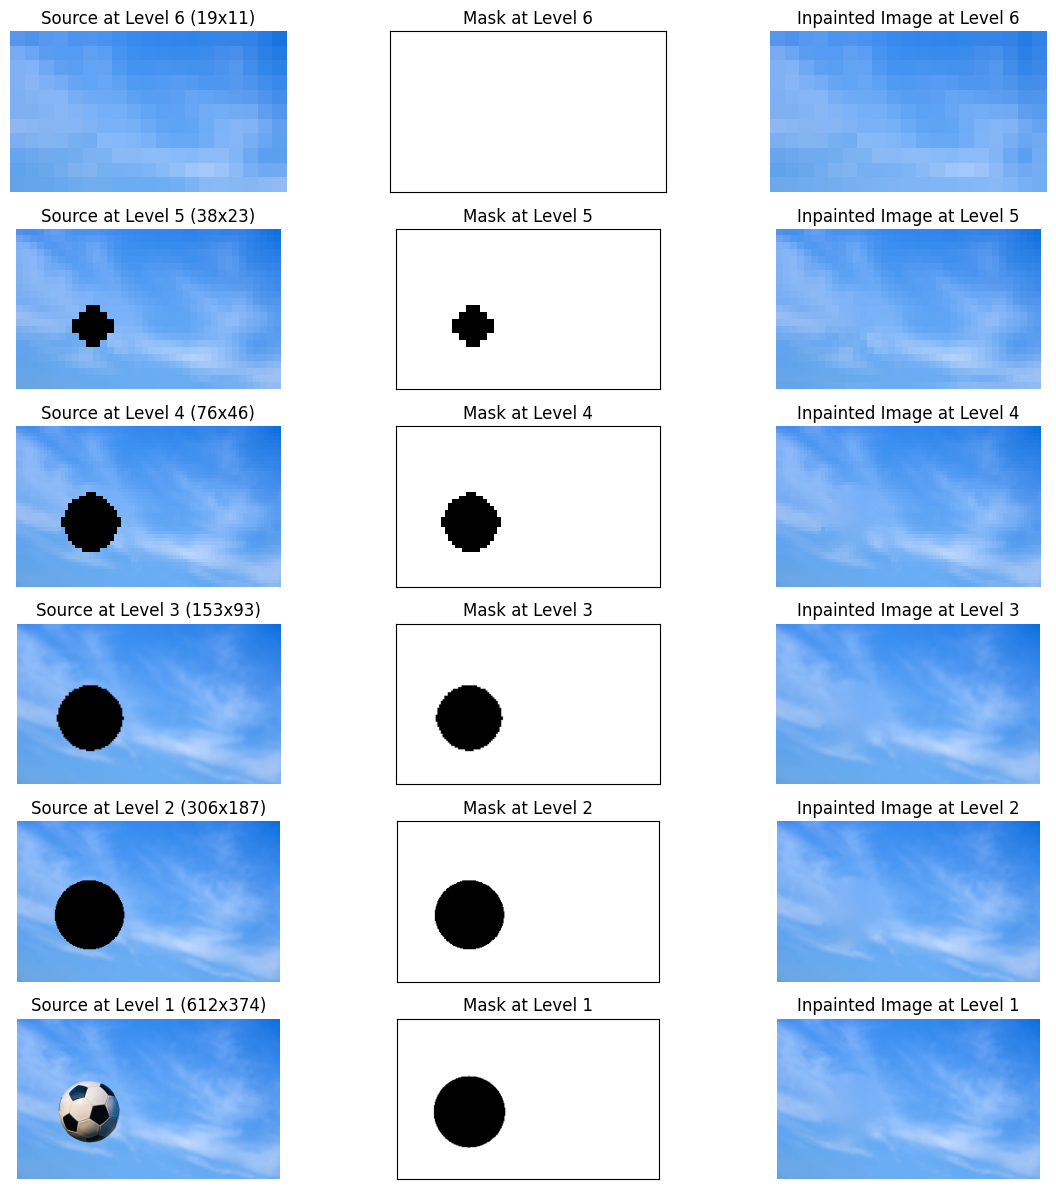

In [ ]:
plot_images_level_wise(inpainted_images, sources, masks)

In [4]:
src_path = "../images/tattoo.png"
mask_path = "../images/tattoo_mask.png"
inpainted_images3, sources3, masks3 = test_inpainting(src_path, mask_path)

Level 6 done in 0.01275324821472168 seconds.
Level 5 done in 0.0906062126159668 seconds.
Level 4 done in 0.9531936645507812 seconds.
Level 3 done in 4.875109672546387 seconds.
Level 2 done in 22.482030391693115 seconds.
Level 1 done in 73.12076878547668 seconds.


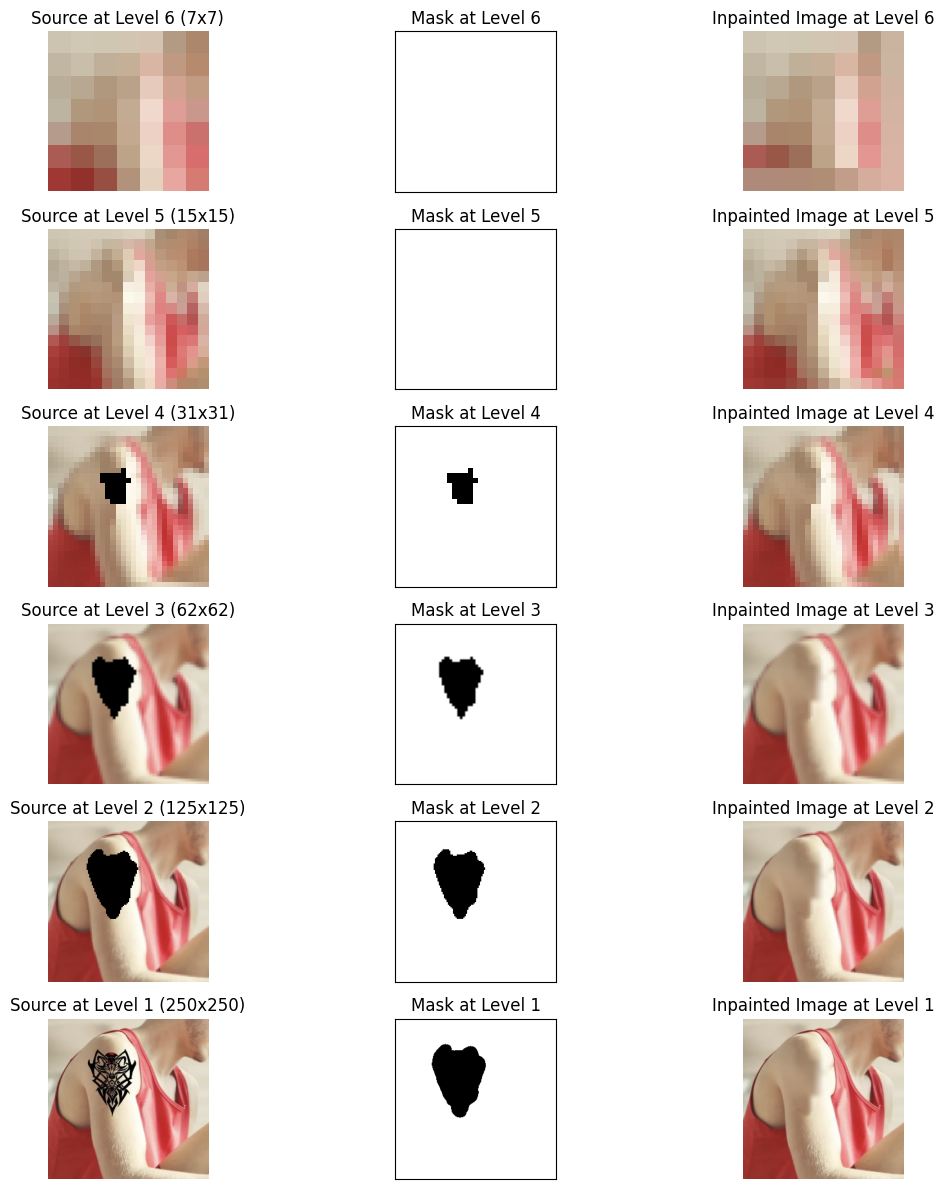

In [5]:
plot_images_level_wise(inpainted_images3, sources3, masks3)

In [ ]:
src_path = "../images/watermark.png"
mask_path = "../images/watermark_mask.png"
inpainted_images4, sources4, masks4 = test_inpainting(src_path, mask_path)

Level 6 done in 0.03284859657287598 seconds.
Level 5 done in 0.1994643211364746 seconds.
Level 4 done in 2.134989023208618 seconds.
Level 3 done in 13.524232387542725 seconds.
Level 2 done in 44.48485255241394 seconds.
Level 1 done in 185.44522762298584 seconds.


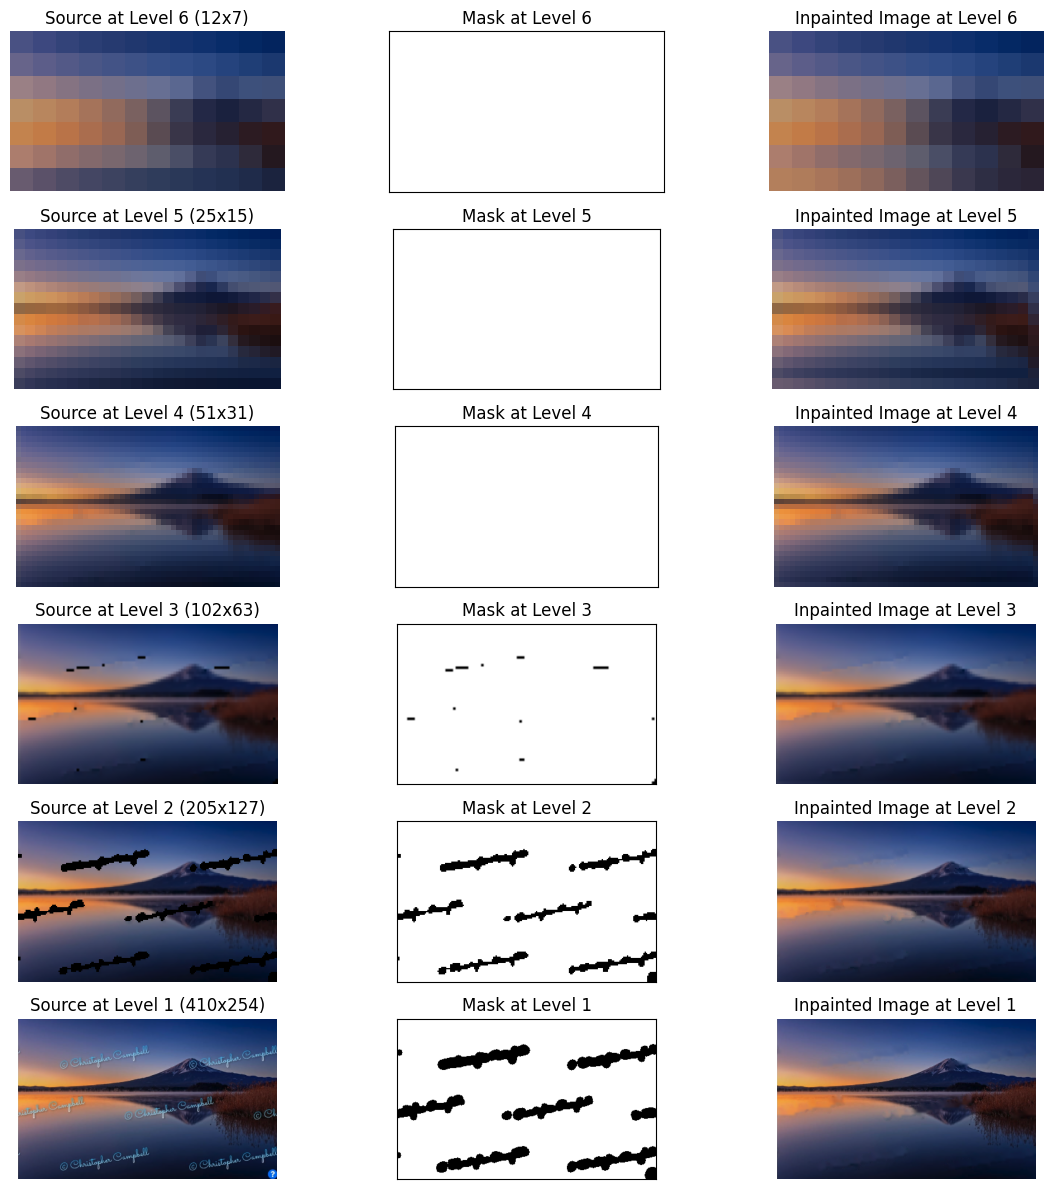

In [ ]:
plot_images_level_wise(inpainted_images4, sources4, masks4)

In [ ]:
src_path = "../images/photo_bomb.jpg"
mask_path = "../images/photo_bomb_mask.jpg"
inpainted_images6, sources6, masks6 = test_inpainting(src_path, mask_path)

Level 6 done in 0.011914968490600586 seconds.
Level 5 done in 0.0730891227722168 seconds.
Level 4 done in 0.7375400066375732 seconds.
Level 3 done in 3.4771881103515625 seconds.
Level 2 done in 11.920835018157959 seconds.
Level 1 done in 45.525928020477295 seconds.


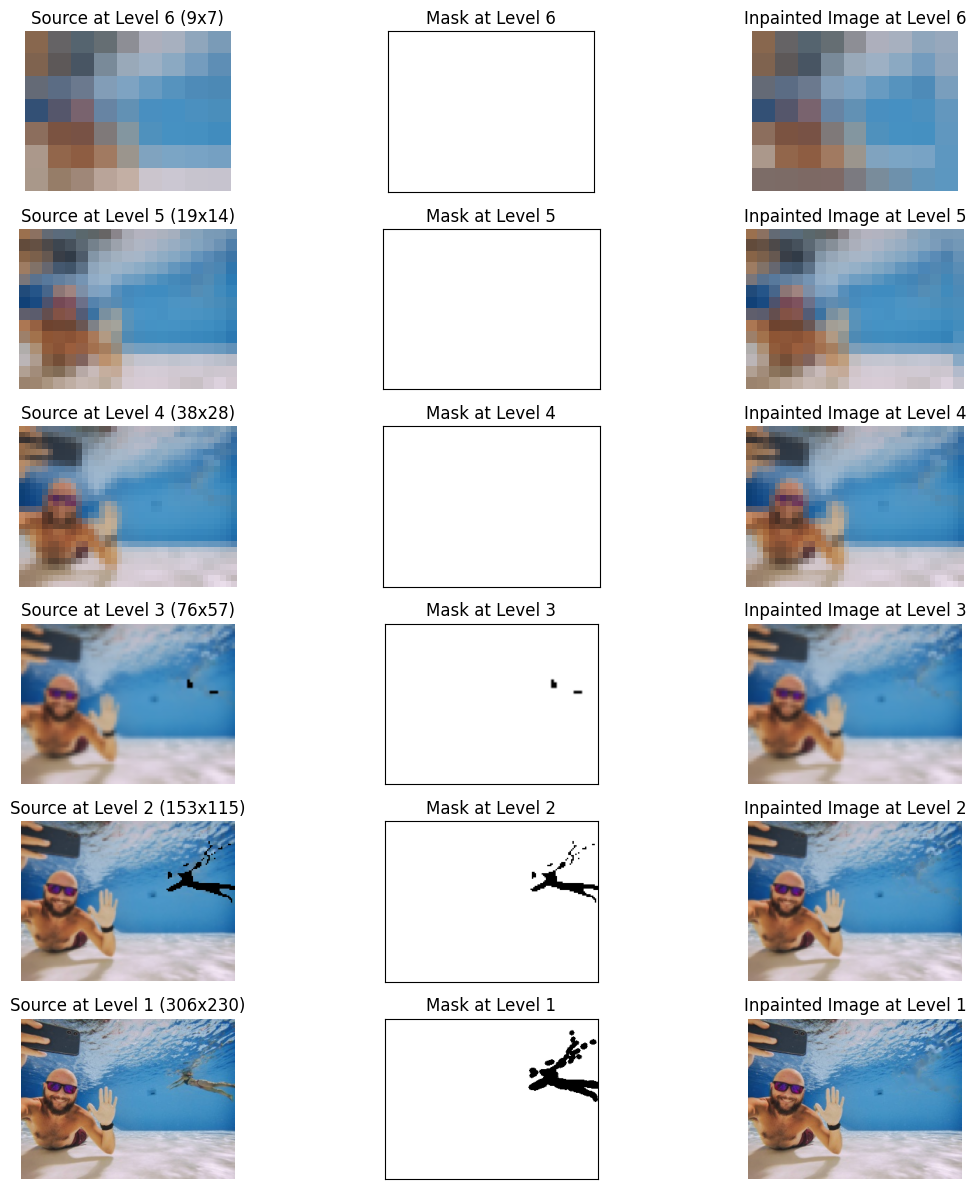

In [ ]:
plot_images_level_wise(inpainted_images6, sources6, masks6)

Level 6 done in 0.0984199047088623 seconds.
Level 5 done in 0.8409199714660645 seconds.
Level 5 done in 0.8409199714660645 seconds.
Level 4 done in 5.855785369873047 seconds.
Level 4 done in 5.855785369873047 seconds.
Level 3 done in 19.22682499885559 seconds.
Level 3 done in 19.22682499885559 seconds.
Level 2 done in 55.035521507263184 seconds.
Level 2 done in 55.035521507263184 seconds.
Level 1 done in 281.1937325000763 seconds.
Level 1 done in 281.1937325000763 seconds.


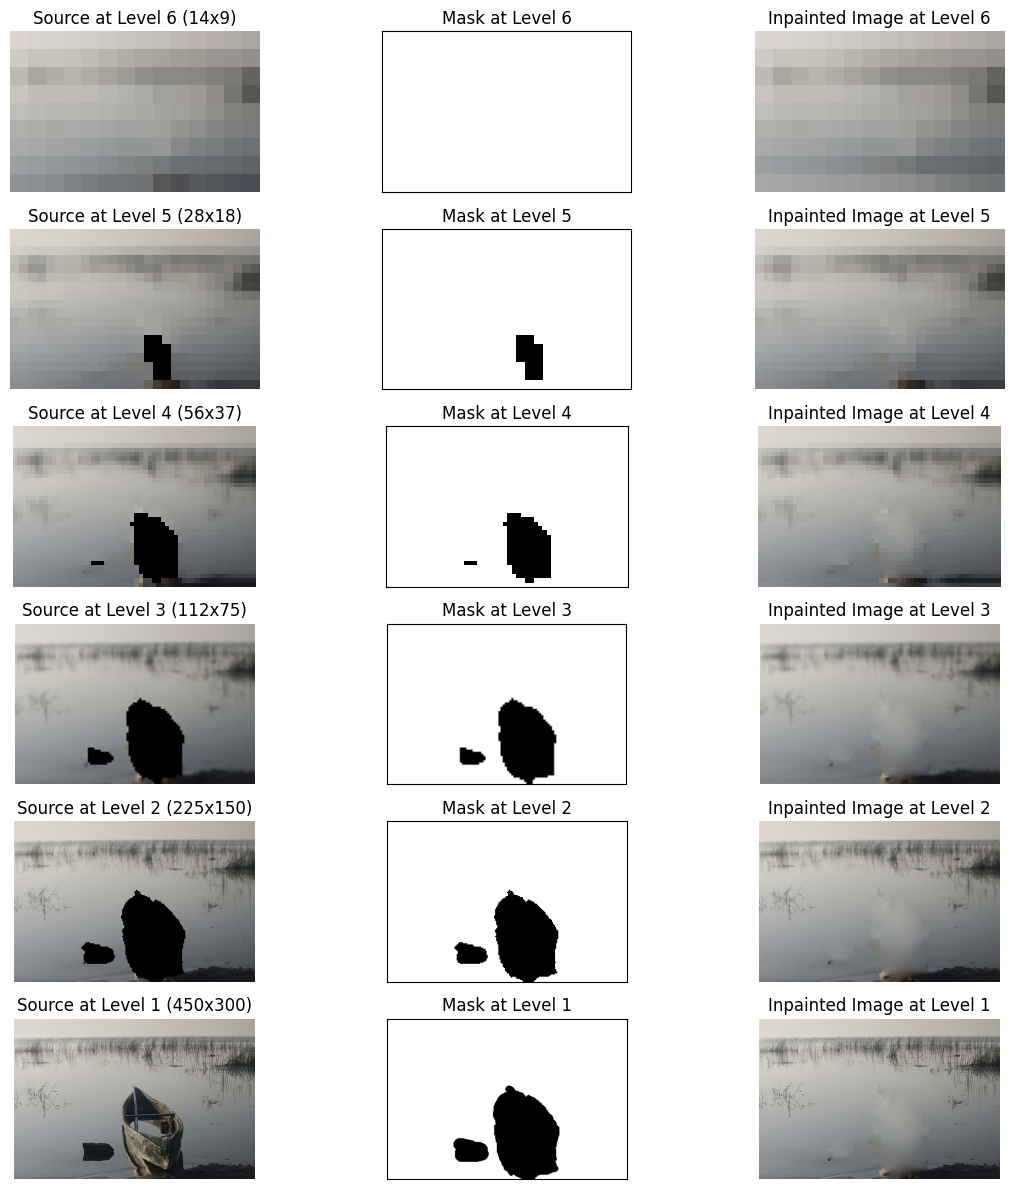

In [10]:
# 1. Boat Image
src_path = "../images/natural_boat.jpg"
mask_path = "../images/boat_mask.png"
# Ensure these files exist or update paths
import os
if os.path.exists(src_path) and os.path.exists(mask_path):
    inpainted_images_boat, sources_boat, masks_boat = test_inpainting(src_path, mask_path)
    plot_images_level_wise(inpainted_images_boat, sources_boat, masks_boat)
else:
    print(f"Files not found: {src_path} or {mask_path}")

Level 6 done in 0.16272759437561035 seconds.
Level 5 done in 1.7265911102294922 seconds.
Level 5 done in 1.7265911102294922 seconds.
Level 4 done in 11.605132341384888 seconds.
Level 4 done in 11.605132341384888 seconds.
Level 3 done in 42.073118686676025 seconds.
Level 3 done in 42.073118686676025 seconds.
Level 2 done in 149.6326892375946 seconds.
Level 2 done in 149.6326892375946 seconds.
Level 1 done in 1696.1641314029694 seconds.
Level 1 done in 1696.1641314029694 seconds.


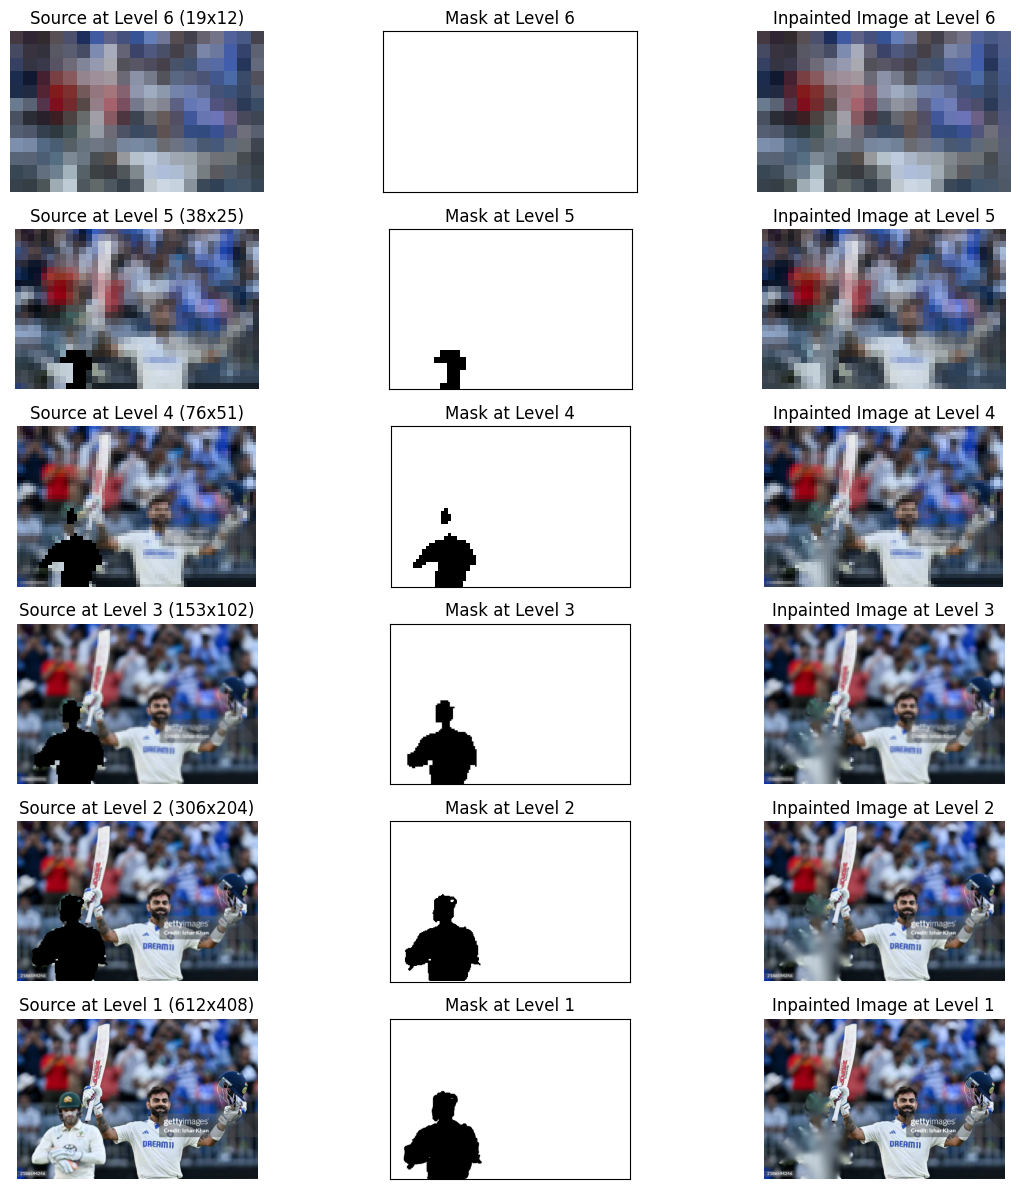

In [8]:
# 2. Cricket Player Image
src_path = "../images/virat_real.jpg"
mask_path = "../images/virat_mask.png"
# Ensure these files exist or update paths
if os.path.exists(src_path) and os.path.exists(mask_path):
    inpainted_images_cricket, sources_cricket, masks_cricket = test_inpainting(src_path, mask_path)
    plot_images_level_wise(inpainted_images_cricket, sources_cricket, masks_cricket)
else:
    print(f"Files not found: {src_path} or {mask_path}")

Level 6 done in 0.11255025863647461 seconds.
Level 5 done in 0.7620656490325928 seconds.
Level 5 done in 0.7620656490325928 seconds.
Level 4 done in 5.417724132537842 seconds.
Level 4 done in 5.417724132537842 seconds.
Level 3 done in 21.871914625167847 seconds.
Level 3 done in 21.871914625167847 seconds.
Level 2 done in 76.64531230926514 seconds.
Level 2 done in 76.64531230926514 seconds.
Level 1 done in 694.0089569091797 seconds.
Level 1 done in 694.0089569091797 seconds.


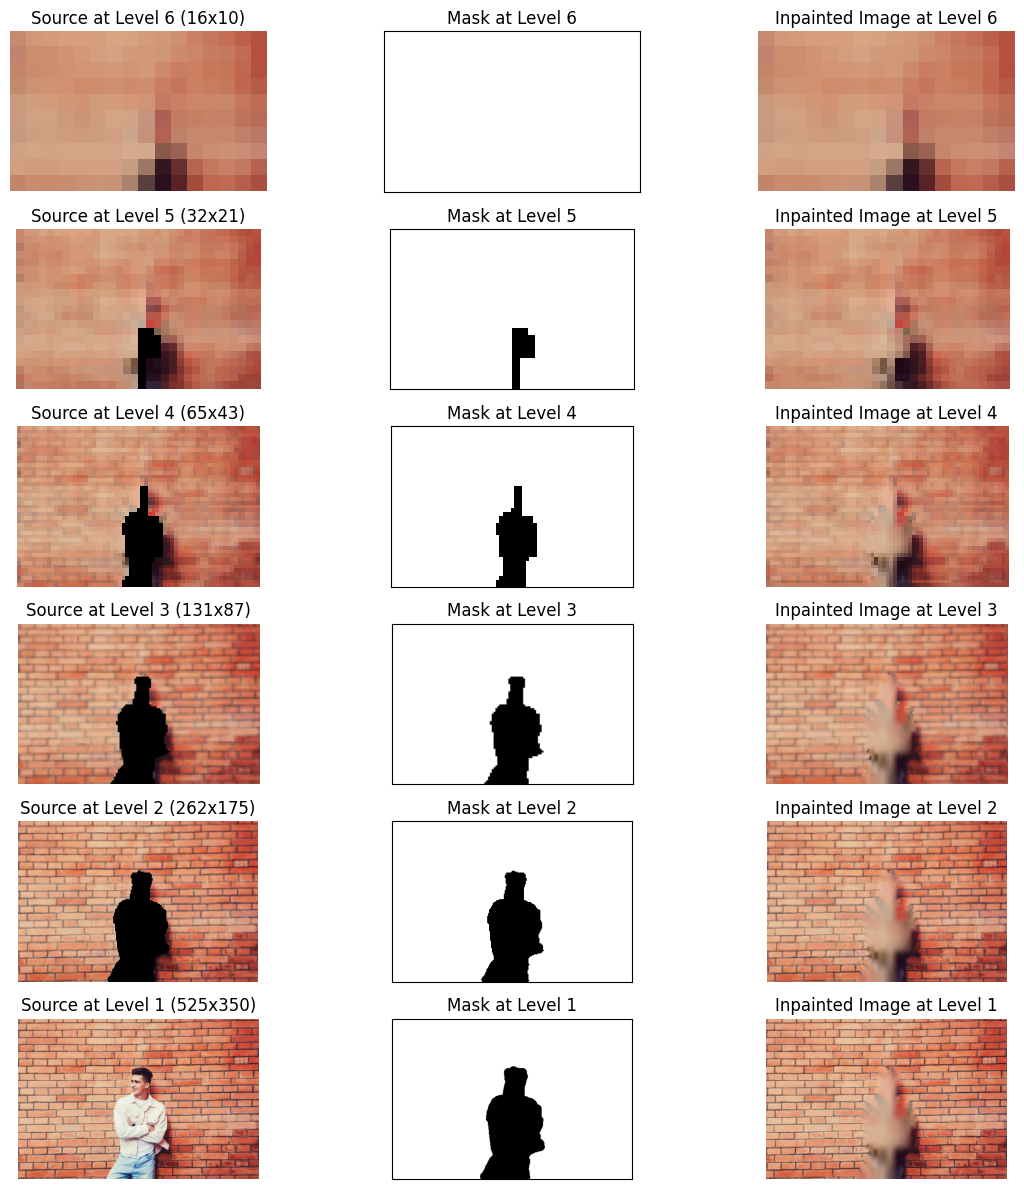

In [9]:
# 3. Man against Brick Wall Image
src_path = "../images/wall_real.png"
mask_path = "../images/wall.png"
# Ensure these files exist or update paths
if os.path.exists(src_path) and os.path.exists(mask_path):
    inpainted_images_man, sources_man, masks_man = test_inpainting(src_path, mask_path)
    plot_images_level_wise(inpainted_images_man, sources_man, masks_man)
else:
    print(f"Files not found: {src_path} or {mask_path}")